# 1. Data Exploration, Cleaning, and Preprocessing

## Setup - Load Libraries and Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# Load data
ames_raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)

## Initial Exploration of Dataset Structure

In [3]:
# Shape of the dataset
ames_raw.shape

(2580, 81)

In [4]:
# Datatypes, missing values, etc.
ames_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [5]:
# First few rows
ames_raw.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [7]:
# Check for duplicate rows
ames_raw.duplicated().sum()

1

In [10]:
# Check for missing values
missing_values = ames_raw.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64


## Data Cleaning

In [27]:
# Create a copy
ames_clean = ames_raw.copy()

In [28]:
# Remove duplicates
ames_clean.drop_duplicates(inplace=True)
ames_clean.shape

(2579, 81)

In [29]:
# If column has string data, replace missing values with 'none'; if column has numeric data, replace missing values with 0
for col in ames_clean.columns:
    if ames_clean[col].isnull().any():
        if ames_clean[col].dtype == 'object':
            ames_clean[col].fillna('none', inplace=True)
        elif ames_clean[col].dtype in ['float64', 'int64']:
            ames_clean[col].fillna(0, inplace=True)

# Check for missing values
print(ames_clean.isnull().sum().any())

False


In [30]:
# Drop the PID column
ames_clean.drop('PID', axis=1, inplace=True)

# Reset the index
ames_clean.reset_index(drop=True, inplace=True)

ames_clean.shape

(2579, 80)

## Exploratory Data Analysis

In [31]:
# Categorize columns
numeric_columns = ames_clean.select_dtypes(['int64', 'float64']).columns
categorical_columns = ames_clean.columns.difference(numeric_columns)

In [32]:
numeric_columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [33]:
categorical_columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

array([[<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHa

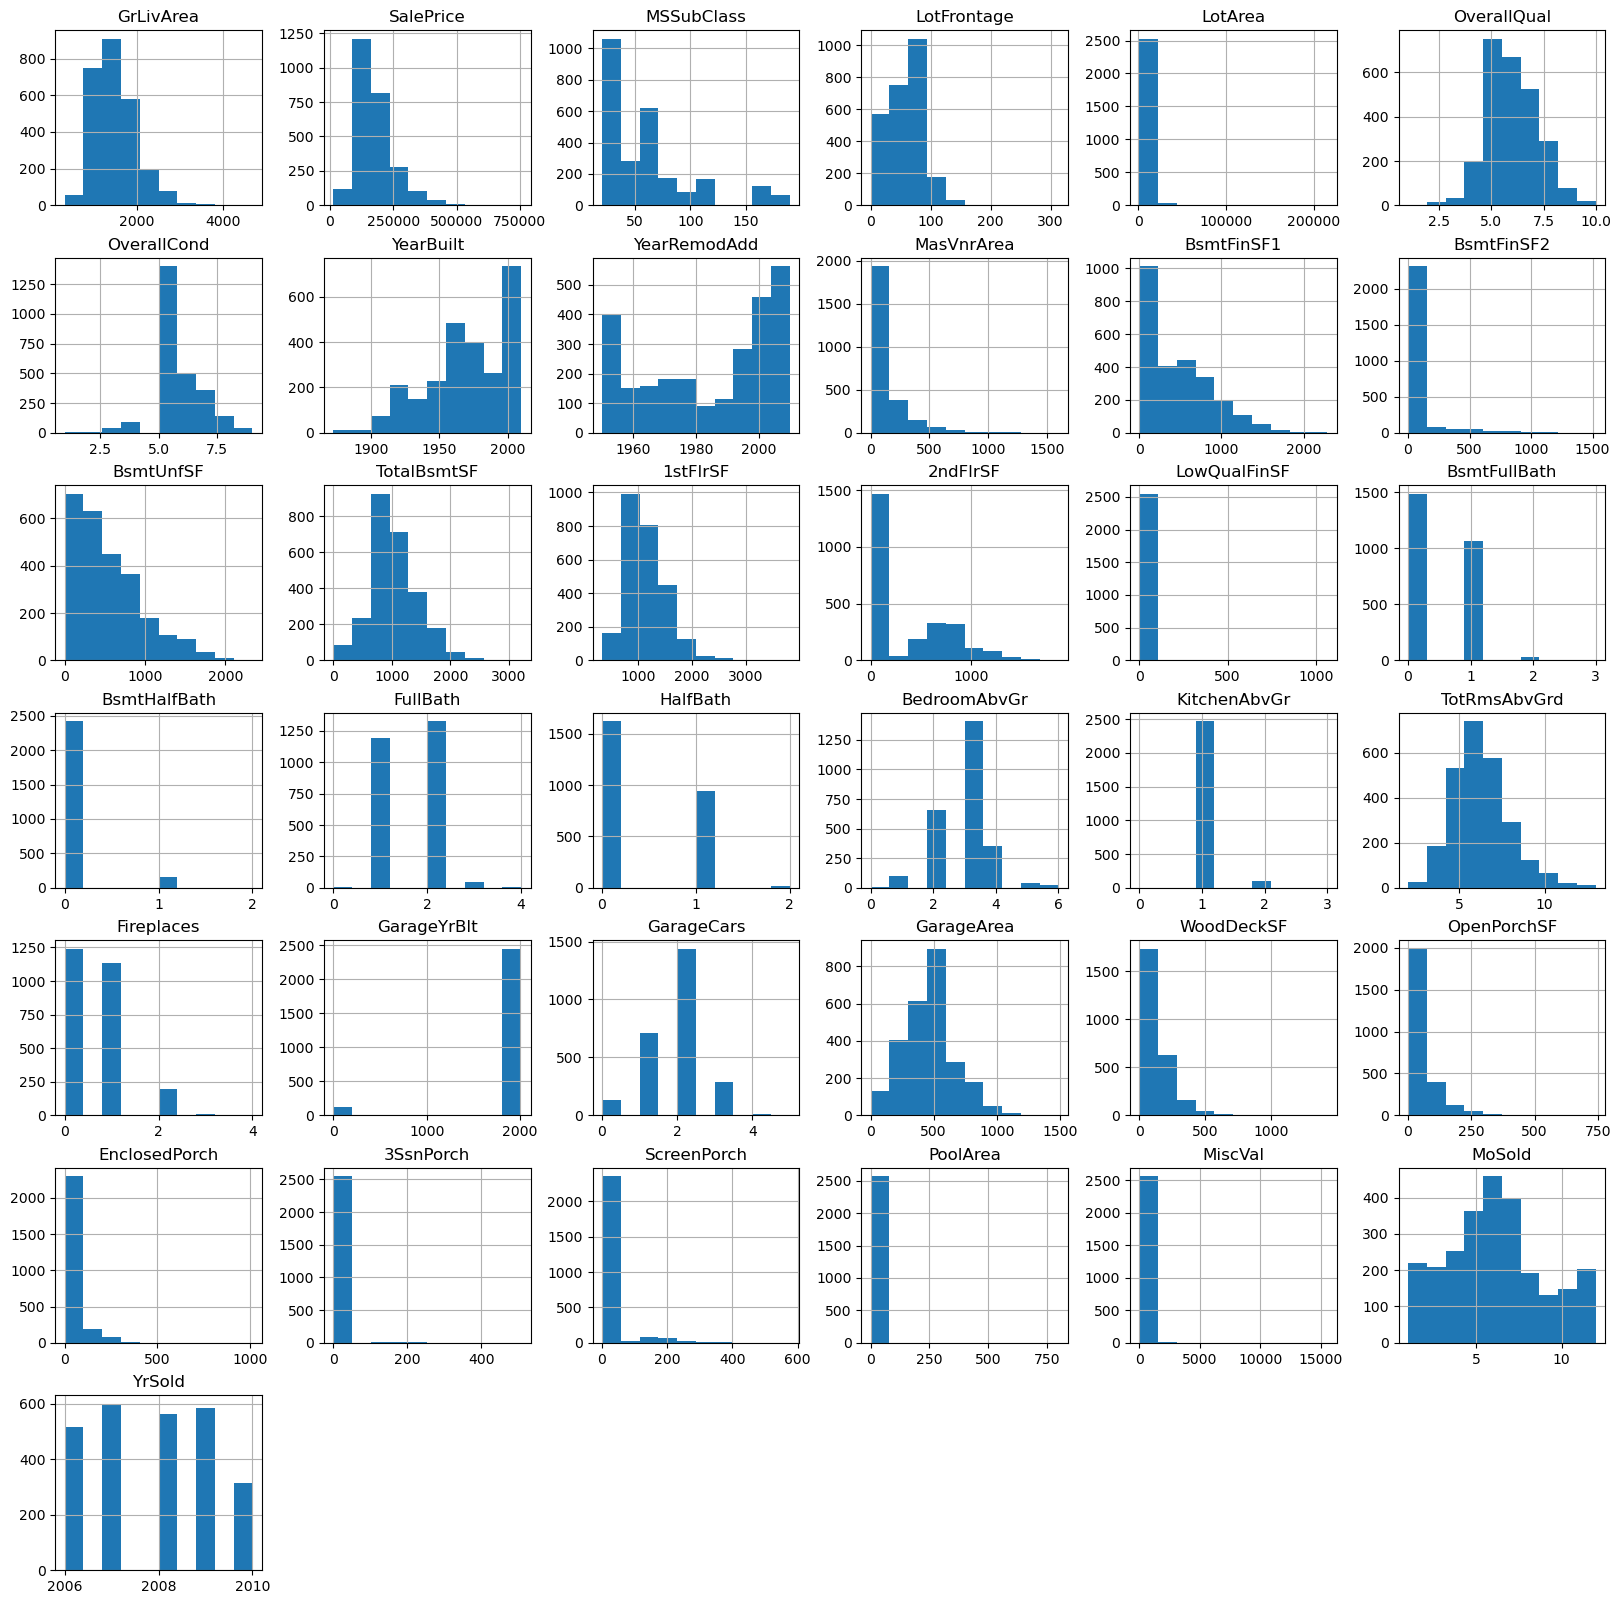

In [34]:
# Visualize numeric data
ames_clean[numeric_columns].hist(figsize=(20,20))

In [35]:
# Summary statistics for numeric columns
ames_clean[numeric_columns].describe()

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.00000,2579.000000,2579.000000,2579.000000,2579.000000,...,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000
mean,1485.950368,178053.442420,57.694843,56.237689,10119.269484,6.04653,5.618457,1970.325708,1983.765025,98.807677,...,466.683598,95.956960,46.103141,23.223342,2.512214,16.162854,1.662660,48.750291,6.152385,2007.839085
std,488.723768,75044.983207,42.810137,33.446119,8128.389882,1.36770,1.122200,29.719469,20.483428,175.569308,...,207.677396,129.063212,66.067238,64.118627,25.298791,56.803807,30.345262,498.820852,2.669913,1.312088
min,334.000000,12789.000000,20.000000,0.000000,1300.000000,1.00000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1112.000000,129950.000000,20.000000,40.000000,7406.500000,5.00000,5.000000,1953.000000,1965.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1436.000000,159900.000000,50.000000,61.000000,9382.000000,6.00000,5.000000,1972.000000,1992.000000,0.000000,...,474.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1733.000000,209750.000000,70.000000,78.000000,11485.500000,7.00000,6.000000,1999.000000,2003.000000,157.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.00000,9.000000,2010.000000,2010.000000,1600.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [36]:
# Get list of values for each categorical column
for col in categorical_columns:
    print(col)
    print(ames_clean[col].value_counts().head(10))
    print('')

Alley
none    2411
Grvl     105
Pave      63
Name: Alley, dtype: int64

BldgType
1Fam      2138
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: BldgType, dtype: int64

BsmtCond
TA      2315
Gd       101
Fa        88
none      69
Ex         3
Po         3
Name: BsmtCond, dtype: int64

BsmtExposure
No      1708
Av       344
Gd       242
Mn       214
none      71
Name: BsmtExposure, dtype: int64

BsmtFinType1
GLQ     753
Unf     706
ALQ     397
Rec     265
BLQ     250
LwQ     139
none     69
Name: BsmtFinType1, dtype: int64

BsmtFinType2
Unf     2179
Rec       97
LwQ       84
none      70
BLQ       64
ALQ       53
GLQ       32
Name: BsmtFinType2, dtype: int64

BsmtQual
TA      1166
Gd      1076
Ex       188
Fa        78
none      69
Po         2
Name: BsmtQual, dtype: int64

CentralAir
Y    2416
N     163
Name: CentralAir, dtype: int64

Condition1
Norm      2227
Feedr      137
Artery      81
RRAn        40
PosN        37
RRAe        26
PosA        19
RRNn         8
RRNe 

In [37]:
# Output file
ames_clean.to_csv('data/Ames_Housing_Price_Data_clean.csv', index=False)